In [1]:
#pre_processing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn import tree
from sklearn import metrics

In [4]:
data=pd.read_csv("Train_data.csv")

In [5]:
data

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,No,0.927000,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.03980,1947,3.0,very low
1,15901,0.8550,0.4560,0.4850,No,0.088400,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.85900,2020,2.4,low
2,9002,0.8270,0.4950,0.4990,No,0.000000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.70900,1950,2.6,very low
3,6734,0.6540,0.6430,0.4690,No,0.108000,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.96400,1974,2.4,low
4,15563,0.7380,0.7050,0.3110,No,0.000000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.78500,1973,3.4,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,No,0.000000,1,0.353,-5.461,Major,01-07-2014,0.4070,81.940,0.74400,2014,3.4,average
12223,1701,0.9120,0.4510,0.2400,No,0.000002,1,0.175,-14.014,Major,01-01-1959,0.0351,134.009,0.70100,1959,2.0,very high
12224,3351,0.3280,0.5510,0.5640,No,0.002950,2,0.352,-9.298,Minor,01-01-1984,0.0338,124.883,0.89000,1984,2.5,low
12225,8879,0.1220,0.0608,0.9390,No,0.991000,1,0.912,-26.324,Major,09-01-2017,0.1180,73.234,0.00558,2017,3.1,high


In [6]:
data["loudness"]= (data["loudness"]-data["loudness"].min())/(data["loudness"].max()-data["loudness"].min())

In [7]:
data["duration-min"]= (data["duration-min"]-data["duration-min"].min())/(data["duration-min"].max()-data["duration-min"].min())

In [8]:
data["tempo"]= (data["tempo"]-data["tempo"].min())/(data["tempo"].max()-data["tempo"].min())

In [9]:
data['explicit'].replace(to_replace=['Yes', 'No'], value=[1,0], inplace=True)

In [10]:
data['mode'].replace(to_replace=['Major','Minor'], value=[1,0], inplace=True)

In [11]:
release_date = data['release_date'].str.split('-',expand = True)
data['release_day'] = pd.to_numeric(release_date[0])
data['release_month'] = pd.to_numeric(release_date[1])
data['release_year'] = pd.to_numeric(release_date[2])

In [12]:
data.drop(columns =["release_date"], inplace = True) 
data.drop(columns =["year"], inplace = True) 

In [13]:
data["release_year"]= (data["release_year"]-data["release_year"].min())/(data["release_year"].max()-data["release_year"].min())

In [14]:
data["release_month"]= (data["release_month"]-data["release_month"].min())/(data["release_month"].max()-data["release_month"].min())

In [15]:
data = data.drop("id", axis=1)

In [16]:
factor = pd.factorize(data['popularity'])
data['popularity'] = factor[0]
definition = factor[1]

In [17]:
popularity = data['popularity']
data.drop(columns =["popularity"], inplace = True)
data['popularity'] = popularity

In [18]:
data

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,duration-min,release_day,release_month,release_year,popularity
0,0.9490,0.2350,0.0276,0,0.927000,5,0.513,0.365189,1,0.0381,0.511144,0.03980,0.038567,1,0.000000,0.267327,0
1,0.8550,0.4560,0.4850,0,0.088400,4,0.151,0.752995,1,0.0437,0.701272,0.85900,0.030303,13,0.909091,0.990099,1
2,0.8270,0.4950,0.4990,0,0.000000,0,0.401,0.798520,0,0.0474,0.498075,0.70900,0.033058,1,0.000000,0.297030,0
3,0.6540,0.6430,0.4690,0,0.108000,7,0.218,0.621782,1,0.0368,0.385698,0.96400,0.030303,30,0.272727,0.534653,1
4,0.7380,0.7050,0.3110,0,0.000000,5,0.322,0.701636,1,0.0488,0.540760,0.78500,0.044077,1,0.000000,0.524752,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,0.0408,0.8090,0.8010,0,0.000000,1,0.353,0.855467,1,0.4070,0.377877,0.74400,0.044077,1,0.545455,0.930693,2
12223,0.9120,0.4510,0.2400,0,0.000002,1,0.175,0.664313,1,0.0351,0.618000,0.70100,0.024793,1,0.000000,0.386139,4
12224,0.3280,0.5510,0.5640,0,0.002950,2,0.352,0.769712,0,0.0338,0.575914,0.89000,0.031680,1,0.000000,0.633663,1
12225,0.1220,0.0608,0.9390,0,0.991000,1,0.912,0.389192,1,0.1180,0.337728,0.00558,0.039945,9,0.000000,0.960396,3


<AxesSubplot:>

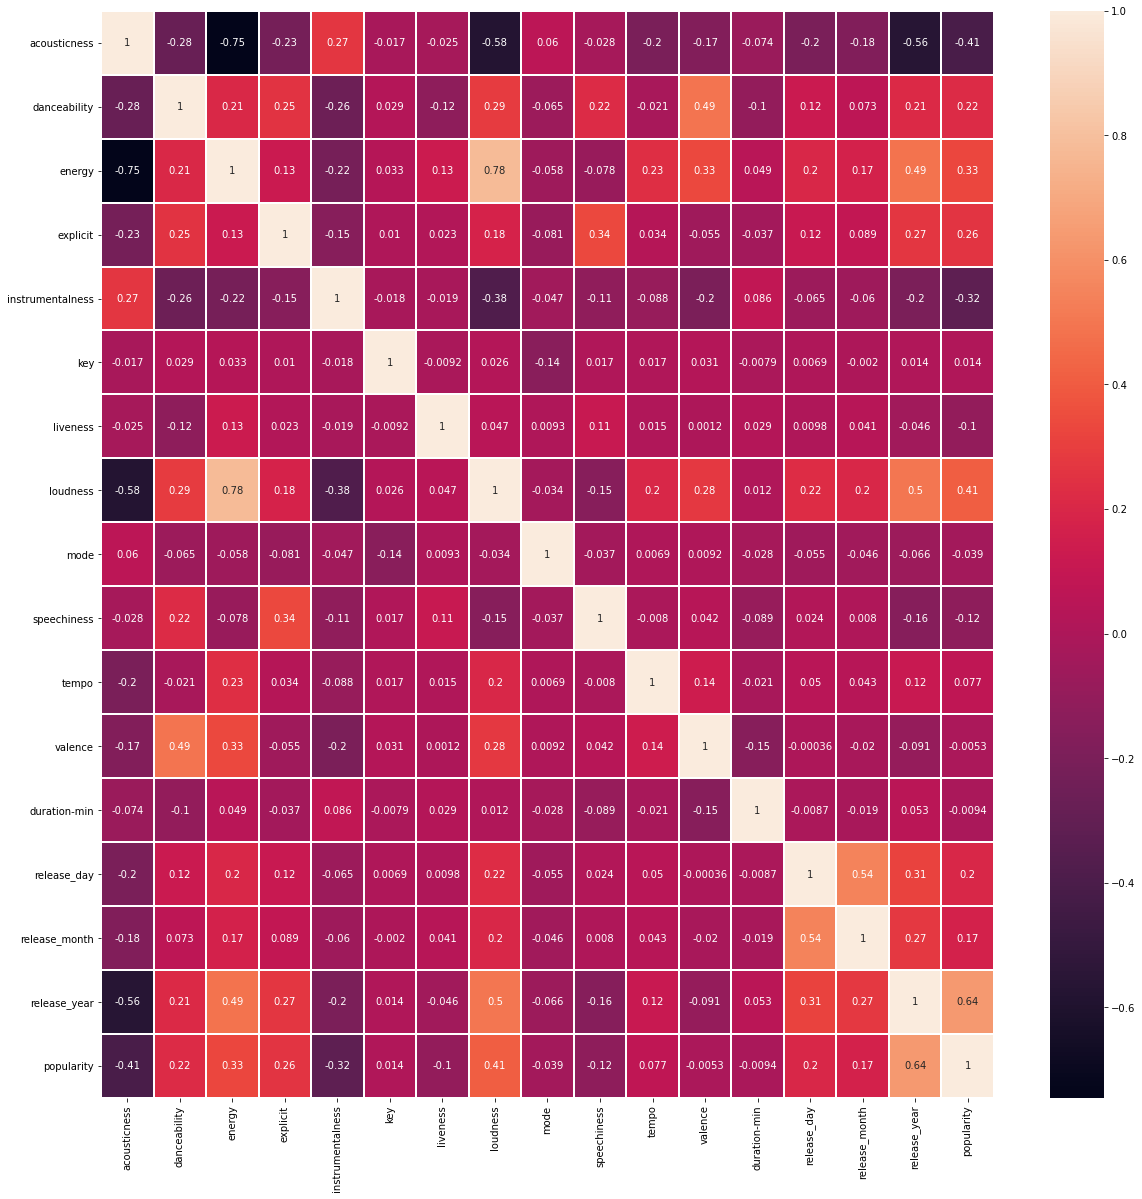

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,linewidths=1,fmt='.2g')

In [20]:
Y = data['popularity']
X = data.drop("popularity",axis=1)
X

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,duration-min,release_day,release_month,release_year
0,0.9490,0.2350,0.0276,0,0.927000,5,0.513,0.365189,1,0.0381,0.511144,0.03980,0.038567,1,0.000000,0.267327
1,0.8550,0.4560,0.4850,0,0.088400,4,0.151,0.752995,1,0.0437,0.701272,0.85900,0.030303,13,0.909091,0.990099
2,0.8270,0.4950,0.4990,0,0.000000,0,0.401,0.798520,0,0.0474,0.498075,0.70900,0.033058,1,0.000000,0.297030
3,0.6540,0.6430,0.4690,0,0.108000,7,0.218,0.621782,1,0.0368,0.385698,0.96400,0.030303,30,0.272727,0.534653
4,0.7380,0.7050,0.3110,0,0.000000,5,0.322,0.701636,1,0.0488,0.540760,0.78500,0.044077,1,0.000000,0.524752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,0.0408,0.8090,0.8010,0,0.000000,1,0.353,0.855467,1,0.4070,0.377877,0.74400,0.044077,1,0.545455,0.930693
12223,0.9120,0.4510,0.2400,0,0.000002,1,0.175,0.664313,1,0.0351,0.618000,0.70100,0.024793,1,0.000000,0.386139
12224,0.3280,0.5510,0.5640,0,0.002950,2,0.352,0.769712,0,0.0338,0.575914,0.89000,0.031680,1,0.000000,0.633663
12225,0.1220,0.0608,0.9390,0,0.991000,1,0.912,0.389192,1,0.1180,0.337728,0.00558,0.039945,9,0.000000,0.960396


In [21]:
X_train,X_CV,Y_train,Y_CV=train_test_split(X,Y,test_size=0.1,random_state=50)

In [22]:
# Logistic regression one vs all

lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, Y_train)

y_pred = lm.predict(X_CV)

lm.score(X_CV, Y_CV)

0.5290269828291088

In [23]:
print(metrics.classification_report(Y_CV, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.67      0.63       335
           1       0.48      0.51      0.49       311
           2       0.45      0.29      0.35       282
           3       0.55      0.69      0.61       262
           4       0.00      0.00      0.00        33

    accuracy                           0.53      1223
   macro avg       0.41      0.43      0.42      1223
weighted avg       0.51      0.53      0.51      1223



c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Random forest classifier

clf = RandomForestClassifier(n_estimators = 100)   
clf.fit(X_train, Y_train) 
  
y_pred = clf.predict(X_CV)

In [25]:
print(metrics.classification_report(Y_CV, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       335
           1       0.56      0.71      0.63       311
           2       0.51      0.45      0.48       282
           3       0.66      0.61      0.63       262
           4       0.58      0.21      0.31        33

    accuracy                           0.65      1223
   macro avg       0.63      0.56      0.58      1223
weighted avg       0.65      0.65      0.64      1223



In [26]:
#Decision Tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
y_pred = clf.predict(X_CV)

In [27]:
print(metrics.classification_report(Y_CV, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       335
           1       0.51      0.51      0.51       311
           2       0.38      0.39      0.39       282
           3       0.50      0.47      0.49       262
           4       0.29      0.36      0.32        33

    accuracy                           0.54      1223
   macro avg       0.49      0.50      0.49      1223
weighted avg       0.54      0.54      0.54      1223

